In [4]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-11-04 06:04:03--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.210.139, 173.194.210.100, 173.194.210.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-11-04 06:04:03--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  74.4MB/s    in 0.3s    

2025-11-04 06

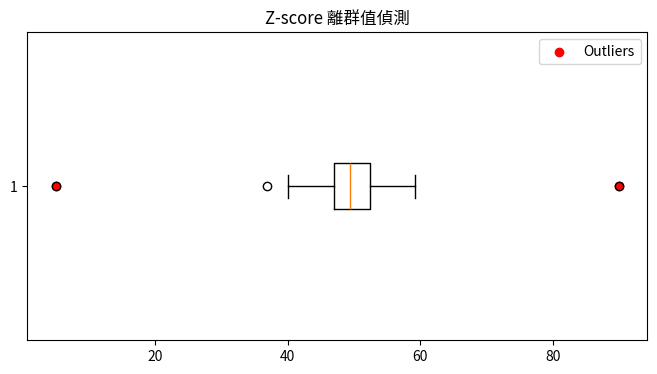

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 產生樣本資料
np.random.seed(42)
data = np.random.normal(50, 5, 100)  # 平均50, 標準差5
data = np.append(data, [90, 5])      # 加入兩個離群值

# 計算Z-score
z_scores = np.abs((data - np.mean(data)) / np.std(data))
outliers = np.where(z_scores > 3)

# 視覺化
plt.figure(figsize=(8,4))
plt.boxplot(data, vert=False)
plt.scatter(data[outliers], [1]*len(outliers[0]), color='red', label='Outliers')
plt.title("Z-score 離群值偵測")
plt.legend()
plt.show()

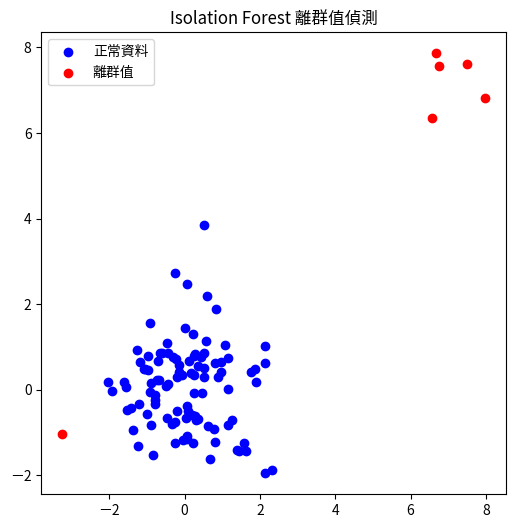

In [6]:
from sklearn.ensemble import IsolationForest

# 模擬資料
X = np.concatenate([np.random.normal(0, 1, (100, 2)), np.random.uniform(6, 8, (5, 2))], axis=0)

# 建立模型
iso = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso.fit_predict(X)

# 視覺化
plt.figure(figsize=(6,6))
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', label='正常資料')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', label='離群值')
plt.legend()
plt.title("Isolation Forest 離群值偵測")
plt.show()

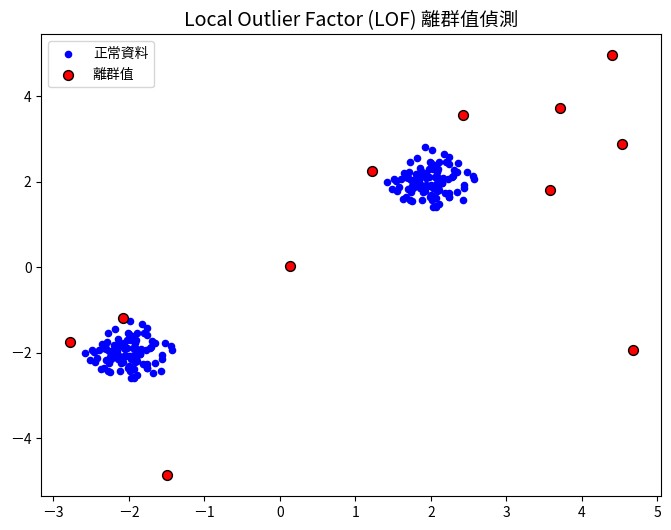

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 產生樣本資料
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)     # 正常群
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-6, high=6, size=(10, 2))  # 離群點
X = np.concatenate([X_inliers, X_outliers], axis=0)

# 建立LOF模型
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)
scores = -lof.negative_outlier_factor_

# 視覺化結果
plt.figure(figsize=(8, 6))
plt.title("Local Outlier Factor (LOF) 離群值偵測", fontsize=14)
plt.scatter(X[:, 0], X[:, 1], color='blue', s=20, label='正常資料')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1],
            color='red', s=50, label='離群值', edgecolors='black')
plt.legend()
plt.show()


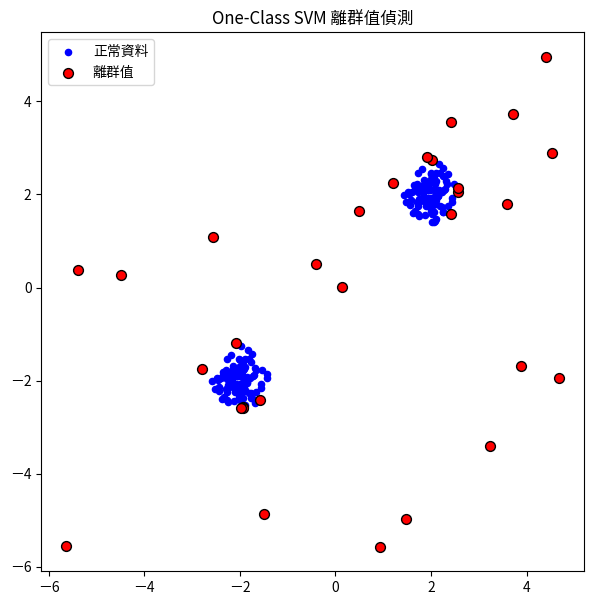

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# 1️⃣ 生成樣本資料
np.random.seed(42)
X_normal = 0.3 * np.random.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X_all = np.concatenate([X_normal, X_outliers], axis=0)

# 2️⃣ 建立 One-Class SVM 模型
clf = svm.OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
clf.fit(X_normal)  # 只用正常資料訓練

# 3️⃣ 預測
y_pred = clf.predict(X_all)
# 1 = 正常, -1 = 離群
inliers = X_all[y_pred == 1]
outliers = X_all[y_pred == -1]

# 4️⃣ 視覺化結果
plt.figure(figsize=(7, 7))
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', s=20, label='正常資料')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=50, label='離群值', edgecolors='black')
plt.legend()
plt.title("One-Class SVM 離群值偵測")
plt.show()


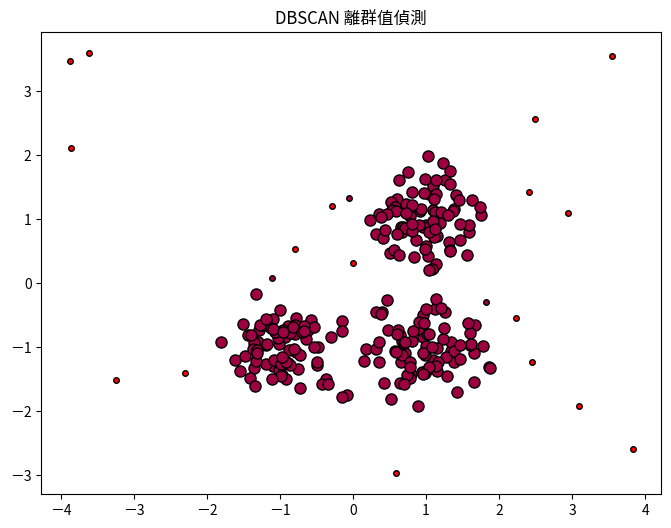

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# 1️⃣ 建立模擬資料
X, _ = make_blobs(n_samples=250, centers=[[1,1], [-1,-1], [1,-1]], cluster_std=0.4, random_state=42)
# 加入離群點
X_outliers = np.random.uniform(low=-4, high=4, size=(15, 2))
X = np.concatenate([X, X_outliers], axis=0)

# 2️⃣ 建立 DBSCAN 模型
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)

# 3️⃣ 標註群集與離群值
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels)

# 4️⃣ 繪圖
plt.figure(figsize=(8,6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [1, 0, 0, 1]  # 離群值用紅色表示
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title("DBSCAN 離群值偵測")
plt.show()

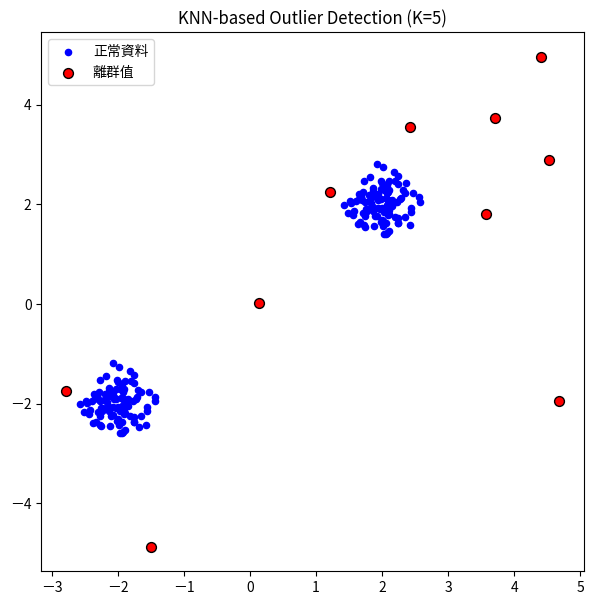

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# 1️⃣ 生成模擬資料
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-6, high=6, size=(10, 2))
X = np.concatenate([X_inliers, X_outliers], axis=0)

# 2️⃣ 使用 KNN 計算離群分數
k = 5
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X)
distances, _ = nbrs.kneighbors(X)

# 取第k個最近距離（或平均距離）
knn_scores = distances[:, -1]  # 第k個最近距離
# knn_scores = distances.mean(axis=1)  # 取平均距離也可

# 3️⃣ 根據閾值判斷離群值（例如第95百分位）
threshold = np.percentile(knn_scores, 95)
outliers = X[knn_scores > threshold]
inliers = X[knn_scores <= threshold]

# 4️⃣ 視覺化結果
plt.figure(figsize=(7,7))
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', s=20, label='正常資料')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=50, edgecolors='black', label='離群值')
plt.legend()
plt.title("KNN-based Outlier Detection (K=5)")
plt.show()
